##Importing Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [47]:
#Importing NLP library and relevant modules
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##Loading dataset

In [48]:
tweet_data = pd.read_csv('/content/tweet_emotions.csv')

In [49]:
tweet_data.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends
6,1956968487,sadness,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [50]:
tweet_data.tail(10)

,tweet_id,sentiment,content
57889,1753918829,neutral,@shonali I think the lesson of the day is not to have luggage
57890,1753918846,neutral,@lovelylisaj can you give me the link for the kimba diaries please?
57891,1753918881,neutral,"@jasimmo Ooo showing of your French skills!! lol Things good over here. Lovely weather, so should be outside How's u?"
57892,1753918892,neutral,"@sendsome2me haha, yeah. Twitter has many uses. For me it's just to know what the ppl i care about are doing"
57893,1753918900,happiness,Succesfully following Tayla!!
57894,1753918954,neutral,@JohnLloydTaylor
57895,1753919001,love,Happy Mothers Day All my love
57896,1753919005,love,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!"
57897,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!
57898,1753919049,love,@mopedronin bullet train from tokyo the gf and i have been visiting japan since thursday vacation/sightseeing gaijin godzilla


In [51]:
pd.set_option('display.max_colwidth', None)

In [52]:
tweet_data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
...,...,...,...
57894,1753918954,neutral,@JohnLloydTaylor
57895,1753919001,love,Happy Mothers Day All my love
57896,1753919005,love,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!"
57897,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!


In [53]:
#checking null values
tweet_data.isnull().sum()

,0
tweet_id,0
sentiment,0
content,0


In [54]:
#checking for duplicated values
tweet_data.duplicated().sum()

17899

##Data Preprocessing

In [55]:
import string
string_punctuations = string.punctuation

In [56]:
string_punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
#Function to perform preprocessing
def preprocess_tweet(tweet):
  tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
  tweet = re.sub(r'@\w+', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'\W', ' ', tweet)
  tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)
  tweet = re.sub(r'\s+', ' ', tweet)
  tweet = tweet.translate(str.maketrans('', '', string_punctuations))
  tweet = tweet.lower()
  return tweet

In [58]:
tweet_data['content'] = tweet_data['content'].apply(preprocess_tweet)

In [59]:
tweet_data['content'].head(10)

,content
0,know was listenin to bad habit earlier and started freakin at his part
1,layin bed with headache ughhhh waitin on your call
2,funeral ceremony gloomy friday
3,wants to hang out with friends soon
4,we want to trade with someone who has houston tickets but no one will
5,re pinging why didn you go to prom bc my bf didn like my friends
6,i should be sleep but im not thinking about an old friend who want but he married now damn amp he wants me 2 scandalous
7,hmmm is down
8,charlene my love miss you
9,m sorry at least it friday


In [60]:
# Remove stopwords and lemmatize
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [61]:
def preprocess_two(text):
  tokens = word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)


In [62]:
tweet_data['content'] = tweet_data['content'].apply(preprocess_two)

In [63]:
#Displaying the cleaned data
pd.set_option('display.max_colwidth', None)
tweet_data[tweet_data.columns].head(10)

,tweet_id,sentiment,content
0,1956967341,empty,know listenin bad habit earlier started freakin part
1,1956967666,sadness,layin bed headache ughhhh waitin call
2,1956967696,sadness,funeral ceremony gloomy friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,want trade someone houston ticket one
5,1956968477,worry,pinging go prom bc bf like friend
6,1956968487,sadness,sleep im thinking old friend want married damn amp want 2 scandalous
7,1956968636,worry,hmmm
8,1956969035,sadness,charlene love miss
9,1956969172,sadness,sorry least friday


##Performing feature extraction

In [64]:
#Performing TF-IDF Vectorization
tf_idf = TfidfVectorizer(max_features=5000)
X = tf_idf.fit_transform(tweet_data['content']).toarray()
y=tweet_data['sentiment']

In [65]:
X.shape

(57899, 5000)

In [66]:
y.shape

(57899,)

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


##Model building

In [100]:
#1. Logistic regression
model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [101]:
y_pred = model_lr.predict(X_test)

In [102]:
lr_ac=model_lr.score(X_test,y_test)

In [103]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.22867012089810018
Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        37
     boredom       0.00      0.00      0.00        50
       empty       1.00      0.00      0.01       244
  enthusiasm       0.00      0.00      0.00       242
         fun       0.00      0.00      0.00       599
   happiness       0.23      0.02      0.03      1798
        hate       0.00      0.00      0.00       283
        love       0.12      0.00      0.00      1307
     neutral       0.23      0.85      0.36      2615
      relief       0.00      0.00      0.00       506
     sadness       0.00      0.00      0.00      1195
    surprise       0.67      0.00      0.01       624
       worry       0.21      0.18      0.20      2080

    accuracy                           0.23     11580
   macro avg       0.19      0.08      0.05     11580
weighted avg       0.20      0.23      0.12     11580

Confu

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


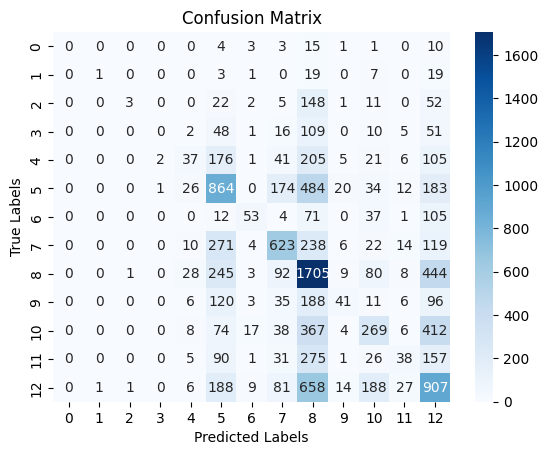

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [73]:
#2.Support Vector Machine
#model_svm=SVC(kernel='linear')
#model_svm.fit(X_train,y_train)

In [74]:
#y_pred_svm = model_svm.predict(X_test)

In [75]:
#model_svm.score(X_test,y_test)

In [76]:
'''
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
'''

'\nprint("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))\nprint("Classification Report:\n", classification_report(y_test, y_pred_svm))\nprint("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))\n'

In [77]:
'''
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
'''

"\nsns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')\nplt.title('Confusion Matrix')\nplt.xlabel('Predicted Labels')\nplt.ylabel('True Labels')\nplt.show()\n"

In [92]:
#3. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)


RandomForestClassifier()

In [94]:
y_pred_rf = rf.predict(X_test)
aac_rf=rf.score(X_test,y_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.48203799654576857
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.32      0.49        37
           1       1.00      0.26      0.41        50
           2       0.88      0.41      0.56       244
           3       0.95      0.61      0.75       242
           4       0.98      0.63      0.76       599
           5       0.94      0.62      0.74      1798
           6       0.89      0.25      0.39       283
           7       0.94      0.68      0.79      1307
           8       0.84      0.55      0.67      2615
           9       0.95      0.59      0.72       506
          10       0.86      0.17      0.29      1195
          11       0.95      0.46      0.62       624
          12       0.91      0.31      0.46      2080

   micro avg       0.91      0.48      0.63     11580
   macro avg       0.93      0.45      0.59     11580
weighted avg       0.91      0.48      0.61     11580
 samples avg

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


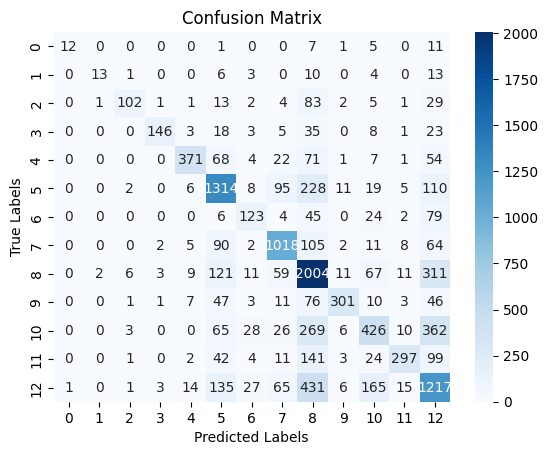

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [81]:
#LSTM Model
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(tweet_data['content'])
X = tokenizer.texts_to_sequences(tweet_data['content'])
X= pad_sequences(X, maxlen=100)

In [82]:
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, tweet_data['sentiment'], test_size=0.2, random_state=42)

In [83]:
# Convert labels to categorical
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [84]:
# Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=5, batch_size=32,validation_split=0.2)

Epoch 1/5
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 500s 345ms/step - accuracy: 0.4033 - loss: 1.8144 - val_accuracy: 0.3849 - val_loss: 1.8314
Epoch 2/5
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 506s 347ms/step - accuracy: 0.4353 - loss: 1.7011 - val_accuracy: 0.4003 - val_loss: 1.8089
Epoch 3/5
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 577s 358ms/step - accuracy: 0.4739 - loss: 1.5809 - val_accuracy: 0.4104 - val_loss: 1.7914
Epoch 4/5
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 560s 357ms/step - accuracy: 0.5032 - loss: 1.4864 - val_accuracy: 0.4215 - val_loss: 1.8056
Epoch 5/5
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 542s 344ms/step - accuracy: 0.5327 - loss: 1.4021 - val_accuracy: 0.4302 - val_loss: 1.8312


In [44]:
loss, accuracy = model.evaluate(X_test, y_test)
print("LSTM Accuracy:", accuracy)

362/362 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4327 - loss: 1.8285
LSTM Accuracy: 0.43022453784942627


##Evaluating and Comparing model's Performance

In [105]:
results = {
    'Logistic Regression': lr_ac,
    'Random Forest Classifier': aac_rf,
    'LSTM': accuracy
}
y_test_original = np.argmax(y_test, axis=0)
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")

Logistic Regression: 0.23
Random Forest Classifier: 0.48
LSTM: 0.43


In [107]:
tweet_data['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [115]:
# Function to predict emotion using TF-IDF based models
def predict_emotion(text, model, tfidf):

    cleaned_text = preprocess_tweet(text)
    cleaned_text = preprocess_two(cleaned_text)


    emotion = model.predict(X)[0]
    return emotion


test_text = "I am not happy today!."
print("Logistic Regression Prediction:", predict_emotion(test_text,model_lr, tf_idf))

print("Random Forest Prediction:", predict_emotion(test_text, rf, tf_idf))

Logistic Regression Prediction: worry
Random Forest Prediction: [False False  True False False False False False False False False False
 False]
